In [1]:
import os

from langchain_community.graphs import Neo4jGraph

os.environ["NEO4J_URI"] = "bolt://localhost:7687"
os.environ["NEO4J_USERNAME"] = "neo4j"
os.environ["NEO4J_PASSWORD"] = "2wsx3edc"

graph = Neo4jGraph()

In [2]:
from langchain_community.document_loaders import PyPDFLoader

In [3]:
loader = PyPDFLoader('../data/台灣人壽金美鑫美元利率變動型終身壽險.pdf')
doc_pages = loader.load()
doc_pages

[Document(metadata={'source': '../data/台灣人壽金美鑫美元利率變動型終身壽險.pdf', 'page': 0}, page_content='第 1 頁，共  3 頁 台灣人壽金美鑫 美元利率變動型 終身壽險  \n保險商品內容說明  \n【承保範圍】  \n【增值回饋分享金的給付及通知】  \n第十二條 \n本公司於本契約有效期間內之每一保單年度屆滿後，除被保險人保險年齡達 16歲前者，按第三項約\n定辦理外，將依要保人於投保時所選擇下列方式之一給付增值回饋分享金：  \n一、  購買增額繳清保險金額：選擇購買增額繳清保險金額者，以增值回饋分享金為躉繳純保險費，計\n算自該保單週年日當日起生效之增額繳清保險金額，但被保險人為 受監護宣告尚未撤銷者 ，應依\n保單條款 第十五條約定辦理。  \n二、  現金給付：選擇現金給付者， 依本契約約定以現金給付 增值回饋分享金予要保人，惟須於第六保\n單年度屆滿後之每一保單週年日起，始得依本款方式給付。  \n三、  儲存生息： 選擇儲存生息者，各年度之增值回饋分享金將按各保單週年日當月之宣告利率依據年\n複利方式，累積至要保人請求時給付，或至被保險人身故、完全失能或本契約終止時，由本公司\n主動一併給付。但在本公司給付受益人保險金而終止契約的情形，要保人未請求之增值回饋分享\n金及其孳息，由該保險金受益人受領。惟須於第六保單年度屆滿後之每一保單週年日起，始得依\n本款方式給付。  \n要保人若未選擇者，則視為選擇 購買增額繳清保險金額 ，並得於本契約有效期間 內，以書面通知本公\n司變更前項給付方式，惟第六保單年度屆滿前，增值回饋分享金限以購買增額繳清保險金額辦理。  \n被保險人保險年齡到達 16歲前，其增值回饋分享金採儲存生息方式辦理，並應於被保險人保險年齡\n到達16歲時，就累計儲存生息之金額一次購買增額繳清保險金額，其後保單年度適用第一項規定。  \n要保人終止本契約，或被保險人於保險年齡達 16歲前死亡或致成完全失能程度者，本公司應退還歷\n年累計儲存生息之金額予要保人。  \n本公司於每一保單年度屆滿後，應將該增值回饋分享金之金額，以書面或電子郵件方式通知要保人。  \n \n【身故保險金或喪 葬費用保險金的給付】  \n第十五條 \n被保險人於本契約有效期間內身故者，本公

In [4]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200, separators=["\n\n", "，", "。", "【", ","])

In [5]:
graph.query('MATCH (n) DETACH DELETE n;')

[]

In [6]:

# from langchain_community.graphs.graph_document import GraphDocument, Node, Relationship, Document
# from typing import List
# from uuid import uuid4 as uuid

# # filename: document_node
# graph_docs: List[GraphDocument] = []
# document = {} # keys [document, node]
# pre_node = None
# graph_doc: GraphDocument = None
# if len(doc_pages) > 0:
#     page = doc_pages[0]
#     path = page.metadata['source']
#     filename = os.path.basename(path)
#     properties = {
#         'filename': filename,
#         'path': path
#     }
#     document['node'] = Node(id=str(uuid()), type='document', properties=properties)
#     document['document'] = Document(page_content="", metadata=properties)
#     pre_node = document['node']
#     graph_doc = GraphDocument(nodes=[], relationships=[], source=document['document'])
#     graph_docs.append(graph_doc)

# chunk_idx = 0
# for page in doc_pages:
#     page_content = page.page_content
#     split_texts = text_splitter.split_text(page_content)
#     for text in split_texts:
#         properties = {
#             'chunk_idx': chunk_idx,
#             'content': text,
#             'name': f'Chunk_{chunk_idx}'
#         }
#         chunk_idx+=1
#         chunk_node = Node(id=str(uuid()), type='chunk', properties=properties)
#         graph_doc.nodes.append(chunk_node)
#         relationship = Relationship(source=pre_node, target=chunk_node, type='next')
#         relationship_part = Relationship(source=document['node'], target=chunk_node, type='part')
#         graph_doc.relationships.append(relationship)
#         graph_doc.relationships.append(relationship_part)
#         pre_node = chunk_node
#         graph.add_graph_documents(graph_docs)
# temp = f'''
# MATCH (n) WHERE n.id = '{document['node'].id}'
# SET n.filename = '{filename}', n.path = '{path}'
# RETURN n
# '''
# graph.query(temp)
import sys
sys.path.append('..')

from tools.graph_builder import TwlfGraphBuilder
graph_builder = TwlfGraphBuilder(graph)
graph.query('MATCH (n) DETACH DELETE n;')

    

[]

In [7]:
graph_builder.graph_build(doc_pages, text_splitter)

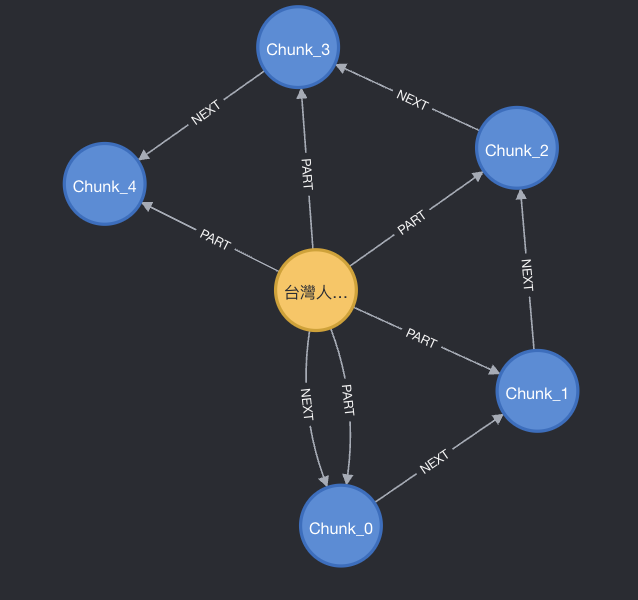

In [8]:
graph.query('MATCH (n) DETACH DELETE n;')

[]

In [9]:

dir = '../data'
for filename in os.listdir(dir):
    docs = []
    if filename.endswith(".pdf"):
        loader = PyPDFLoader(os.path.join(dir, filename))
        doc_pages = loader.load()
        graph_builder.graph_build(doc_pages, text_splitter)

以下提供地端執行方案，依據需要使用

In [ ]:
# # ! pip3 install -qU langchain-huggingface
# import os
# os.environ['SENTENCE_TRANSFORMERS_HOME'] = '../embedding_model'
# from langchain_huggingface import HuggingFaceEmbeddings
# # Choose from https://huggingface.co/spaces/mteb/leaderboard
# embedding = HuggingFaceEmbeddings(model_name="lier007/xiaobu-embedding-v2")

In [6]:
from langchain_community.vectorstores import Neo4jVector
from langchain_openai import AzureOpenAIEmbeddings

embedding = AzureOpenAIEmbeddings(
    model="text-embedding-ada-002",
    azure_endpoint='https://lang-chain-dev.openai.azure.com/openai/deployments/text-embedding-ada-002/embeddings?api-version=2023-05-15',
    azure_deployment='text-embedding-ada-002',
    openai_api_version='2023-05-15'
)

In [ ]:
vectorstore = Neo4jVector.from_existing_graph(embedding=embedding, 
                                    index_name="chunk_index",
                                    node_label='Chunk', 
                                    embedding_node_property='embedding', 
                                    text_node_properties=['content'])

In [11]:
query = "未滿15歲身故死亡 身故保險金 怎麼賠?"
docs_with_score = vectorstore.similarity_search_with_score(query, k=2)

In [12]:
for doc, score in docs_with_score:
    print("-" * 80)
    print("Score: ", score)
    print(doc.page_content)
    print("-" * 80)

--------------------------------------------------------------------------------
Score:  0.945751428604126

content: ，本公司應退還歷年累計儲存生息
之金額予要保人。  
本公司於每一保 單年度屆滿後，應將該增值回饋分享金之金額，以書面或電子郵件方式通知要保
人。 
 
【身故保險金或喪葬費用保險金的給付】  
第十六條  
被保險人於本契約有效期間內身故者，本公司按身故日之當年度保險金額給付身故保險金。  
訂立本契約時，以未滿 15足歲之未成年人為被保險人，除喪葬費用之給付外，其餘死亡給付之
約定於被保險人滿 15足歲之日起發生效力；被保險人滿 15足歲前死亡者，其身故保險金變更為
喪葬費用保險金。  
前項未滿 15足歲之被保險人如有於民國九十九年二月三日 (不含 )前訂立之保險契約，其喪葬費
用保險金之給付依下列方式辦理 ：
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Score:  0.9396417737007141

content: ，以累計儲存生息之金額一次計算增額繳清保險金額，其後保單年度適用第一項規定。  
要保人終止本契約，或被保險人於保險年齡達 16歲前死亡者，本公司應退還歷年累計儲存生息之金額予要保人
。 
本公司於每一保單年度屆滿後 ，應將該增值回饋分享金之金額，以書面或電子郵件方式通知要保人。  
 
【身故保險金或喪葬費用保險金的給付】  
被保險人於本契約有效期間內身故者，本公司按下列三款取其最大值給付身故保險金：  
一、身故日之當年度保險金額。  
二、身故日之保單價值準備金 乘以保單價值準備金比率所得之金額。  
三、身故日之年繳應繳保險費總和的 1.06倍。  
訂立本契約時，以未滿 15足歲之未成年人為被保險人，除喪葬費用之給付外，其餘死亡給付之約定於被保險人滿
15足歲之日起發生效力；被保險人滿 15足歲前死亡者，其身故保險金變更

In [ ]:
# from langchain_ollama import ChatOllama
# llm = ChatOllama(
#     model="llama3.1",
# )

In [13]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT_NAME"],
    openai_api_version=os.environ["AZURE_OPENAI_API_VERSION"],
)

In [ ]:
from langchain.chains import GraphCypherQAChain
graph.refresh_schema()
chain = GraphCypherQAChain.from_llm(graph=graph, llm=llm, validate_cypher=True, verbose=True)

In [14]:
chain.invoke('檔名包含金美鑫的產品，第一頁在說什麼?') 



> Entering new GraphCypherQAChain chain...
Generated Cypher:
cypher
MATCH (d:Document)-[:PART]->(c:Chunk)
WHERE d.filename CONTAINS '金美鑫' AND c.page_num = 1
RETURN c.content

Full Context:
[{'c.content': '，應將該增值回饋分享金之金額，以書面或電子郵件方式通知要保人。  \n \n【身故保險金或喪 葬費用保險金的給付】  \n第十五條 \n被保險人於本契約有效期間內身故者，本公司按下列三款取其最大值給付身故保險金：  \n一、身故日之當年度保險金額。  \n二、身故日之保單價值準備金 乘以保單價值準備金比率所得之金額 。 \n三、身故日之應繳保險費總和。  \n訂立本契約時，以未滿 15足歲之未成年人為被保險人，除喪葬費用之給付外，其餘死亡給付之約定\n於被保險人滿 15足歲之日起發生效力；被保險人滿 15足歲前死亡者，其身故保險金變更為喪葬費用\n保險金。  \n前項未滿 15足歲之被保險人如有於民國九十九年二月三日 (不含)前訂立之保險契約，其喪葬費用保\n險金之給付依下列方式辦理：  \n一、被保險人於民國九十九年二月三日 (不含)前訂立之保險契約，喪葬費用保險金額大於或等於遺產\n及贈與稅法第十七條有關遺產稅喪葬費扣除額之半數 (含)者，其喪葬費用保險金之給付，從其約\n定，一百零九年六月十二日 (含)以後所投保之喪葬費用保險金額，本公司不負給付責任，並應無\n息退還該超過部分之已繳保險費。  \n二、被保險人於民國九十九年二月三日 (不含)前訂立之保險契約，喪葬費用保險金額小於遺產及贈與\n稅法第十七條有關遺產稅喪葬費扣除額之半數 (含)者應加計民國一百零九年六月十二日 (含)以\n後所投保之喪葬費 用保險金額，被保險人死亡時，受益人得領取之喪葬費用保險金總和（不限本'}, {'c.content': '第 1 頁，共  3 頁 台灣人壽金美鑫 美元利率變動型 終身壽險  \n保險商品內容說明  \n【承保範圍】  \n【增值回饋分享金的給付及通知】  \n第十二條 \n本公司於本契約有效期間內之每一保單年度屆滿後，除被保險人保險年齡達 16歲前者，按

{'query': '檔名包含金美鑫的產品，第一頁在說什麼?',
 'result': '檔名包含金美鑫的產品，第一頁描述了台灣人壽金美鑫美元利率變動型終身壽險的保險商品內容，包括承保範圍、增值回饋分享金的給付及通知方式，以及身故保險金或喪葬費用保險金的給付方式。'}